In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('C:/Users/aditya/Desktop/zomato.csv')
data.head(10)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   
5  https://www.zomato.com/bangalore/timepass-dinn...   
6  https://www.zomato.com/bangalore/rosewood-inte...   
7  https://www.zomato.com/bangalore/onesta-banash...   
8  https://www.zomato.com/bangalore/penthouse-caf...   
9  https://www.zomato.com/bangalore/smacznego-ban...   

                                             address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2  1112, Next to KIMS Medical College, 17th Cross...   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6  19/1, New Timberyard Layout, Beside Satellite ...   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes                             phone      location  \
0  4.1/5    775    080 42297555\r\n+91 9743772233  Banashankari   
1  4.1/5    787                      080 41714161  Banashankari   
2  3.8/5    918                    +91 9663487993  Banashankari   
3  3.7/5     88                    +91 9620009302  Banashankari   
4  3.8/5    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   
5  3.8/5    286  +91 9980040002\r\n+91 9980063005  Basavanagudi   
6  3.6/5      8    +91 9731716688\r\n080 26740366   Mysore Road   
7  4.6/5   2556      080 48653961\r\n080 48655715  Banashankari   
8  4.0/5    324  +91 8884135549\r\n+91 9449449316  Banashankari   
9  4.2/5    504  +91 9945230807\r\n+91 9743804471  Banashankari   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   
5        Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
6        Casual Dining                                                NaN   
7  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
8                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
9                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                      cuisines approx_cost(for two people)  \
0               North Indian, Mughlai, Chinese                         800   
1                  Chinese, North Indian, Thai                         800   
2                       Cafe, Mexican, Italian                         800   
3                   South Indian, North Indian            

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
#Dropping columns
data.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [5]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
#FINAL DATASET
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes      location            rest_type  \
0          Yes        Yes  4.1/5    775  Banashankari        Casual Dining   
1          Yes         No  4.1/5    787  Banashankari        Casual Dining   
2          Yes         No  3.8/5    918  Banashankari  Cafe, Casual Dining   
3           No         No  3.7/5     88  Banashankari          Quick Bites   
4           No         No  3.8/5    166  Basavanagudi        Casual Dining   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
data.shape

(51674, 14)

#  CLEANING NULL VALUES AND DATA CLEANING

In [9]:
data.isna().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
# DROPING VALUES FOR THE LOCATION VALUE

In [11]:
data['location'].dropna(inplace=True)

In [12]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima

# Clubbing all the blocks of Koramangala under one location

In [13]:
data['location'].replace('Koramangala 5th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 7th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 6th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 3rd Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 2rd Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 4th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 1st Block','Koramangala',inplace=True)

In [14]:
data=data.rename(columns={'approx_cost(for two people)':'cost'})

In [15]:
data=data.rename(columns={'listed_in(city)':'city'})

In [16]:
data.cost.value_counts()

300      7566
400      6554
500      4975
200      4854
600      3711
         ... 
469         1
560         1
160         1
5,000       1
60          1
Name: cost, Length: 70, dtype: int64

In [17]:
#SOME DATA IN THE COLUMN COST IS OF THE FORM 3,700 THIS HAS TO CLUBED TO 3700

In [18]:
data['cost']=[float(str(i).replace(",","")) for i in data['cost']]

In [19]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
data['rate'] = data['rate'].fillna(data['rate'].mode()[0])


In [21]:
rate_hyphen = data.loc[data['rate'] == '-'].index
data.drop(rate_hyphen, axis = 0, inplace = True)

In [22]:
data['rate'].replace({"NEW" : "2.55 /5"}, inplace = True)

In [23]:
data['rate']=data['rate'].apply(lambda x : x.split('/')[0])

In [24]:
data['rate']=data['rate'].apply(lambda x :x.split(' ')[0])

In [25]:
data['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712     3.6
51713    2.55
51714    2.55
51715     4.3
51716     3.4
Name: rate, Length: 51605, dtype: object

In [26]:
data['online_order'].replace({'Yes':1,'No':0},inplace=True )

In [27]:
data['online_order'].unique()

array([1, 0], dtype=int64)

In [28]:
data['book_table'].replace({'Yes':1,'No':0},inplace=True)

In [29]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [30]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table rate  votes      location            rest_type  \
0             1           1  4.1    775  Banashankari        Casual Dining   
1             1           0  4.1    787  Banashankari        Casual Dining   
2             1           0  3.8    918  Banashankari  Cafe, Casual Dining   
3             0           0  3.7     88  Banashankari          Quick Bites   
4             0           0  3.8    166  Basavanagudi        Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type)          city  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari

# EDA

In [31]:
#LETS START WITH ONLINE ORDER

Text(0.5, 1.0, 'ONLINE ORDER COUNTPLOT')

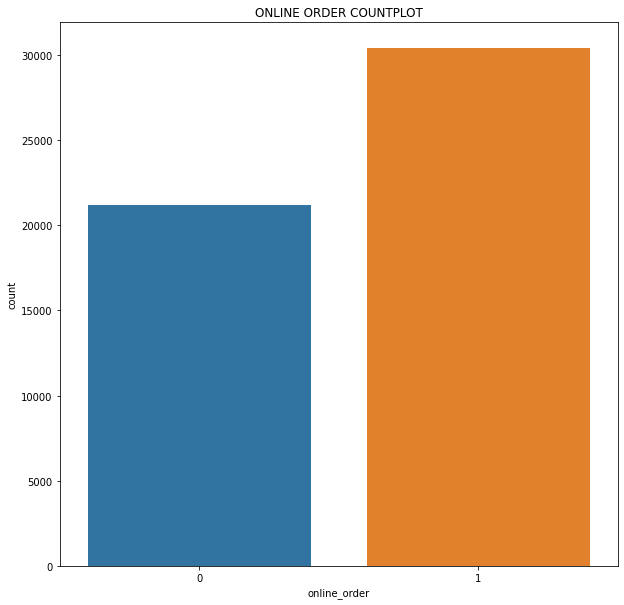

In [32]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(x='online_order',data=data)
plt.title('ONLINE ORDER COUNTPLOT')

# SO MOST PEOPLE IN THIS DATASET ORDER FOOD ONLINE

Text(0.5, 1.0, 'ONLINE ORDER COUNTPLOT')

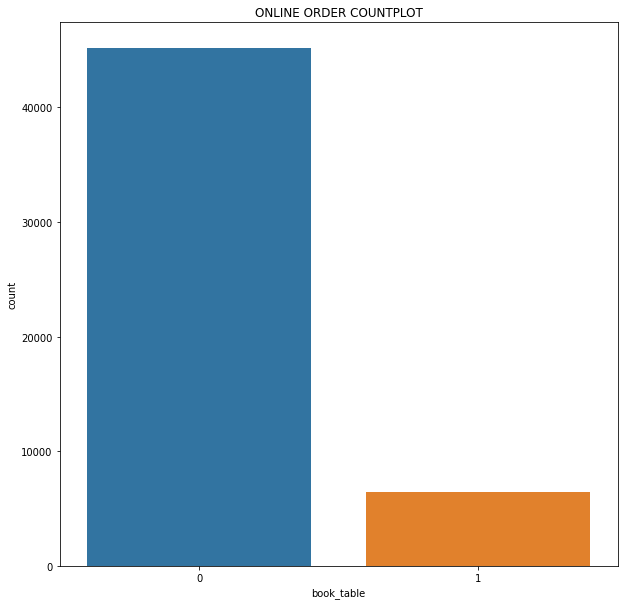

In [33]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(x='book_table',data=data)
plt.title('ONLINE ORDER COUNTPLOT')

# A LARGE SECTION OF PEOPLE ARE THOSE WHO DON'T BOOK A TABLE

Text(0.5, 1.0, 'ONLINE ORDER VS BOOK TABLE')

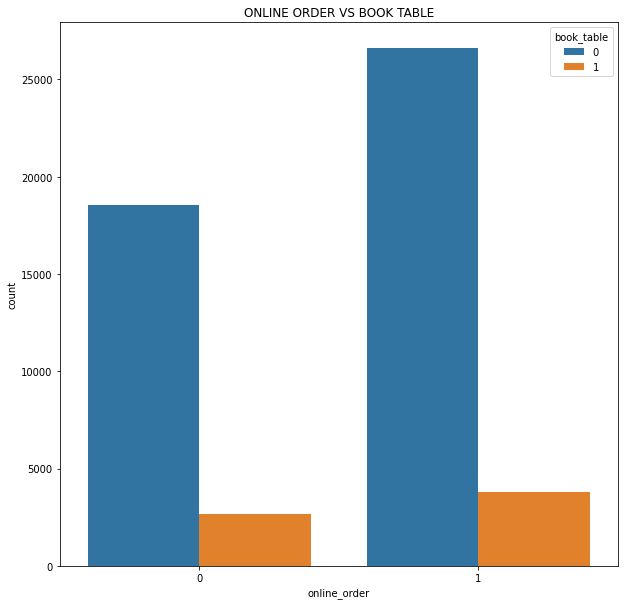

In [34]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(x='online_order',hue='book_table',data=data)
plt.title('ONLINE ORDER VS BOOK TABLE')


# EQUAL REPRESENTATION OF CLASSES IS SEEN

# LETS RUN A CHISQUARE TEST FOR COMPARING ONLINE ORDER AND BOOK TABLE

In [35]:
dataset_table=pd.crosstab(data['online_order'],data['book_table'])
print(dataset_table)

book_table        0     1
online_order             
0             18559  2642
1             26604  3800


In [36]:
dataset_table.values

array([[18559,  2642],
       [26604,  3800]], dtype=int64)

In [37]:
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[18559  2642]
 [26604  3800]]


In [38]:
import scipy.stats as stats

In [39]:

val=stats.chi2_contingency(dataset_table)

In [40]:
val

(0.01220786176555338,
 0.9120214201466288,
 1,
 array([[18554.41842845,  2646.58157155],
        [26608.58157155,  3795.41842845]]))

In [41]:
Expected_Values=val[3]

In [42]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [43]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [44]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.015382032381779454


In [45]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [46]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.9012960177766337
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.9012960177766337


In [47]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# SO WE CAN SEE THAT THERE IS NO RELATION BETWEEN ONLINE ORDER AND BOOKING A TABLE

# LETS SEE HOW RATE AND VOTES ARE RELATED

In [48]:
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [49]:
data.iplot(x='rate',y='votes',mode='markers',size=25,title='scatter plot b/w rate and votes',xTitle='rating',yTitle='votes')

# ONE CAN SEE THAT AS RATING INCREASES MORE NO OF VOTES ARE SEEN 
# THIS MIGHT BE SOME SORT OF CAUSATION NOT CORRELATION SINCE PEOPLE WOULD SEE WHICH RESTAURANT HAS MORE RATING AND END UP GOING THERE AND THUS VOTING IT

Text(0.5, 1.0, 'RATE VS VOTES IN CONTEXT OF ONLINE ORDER')

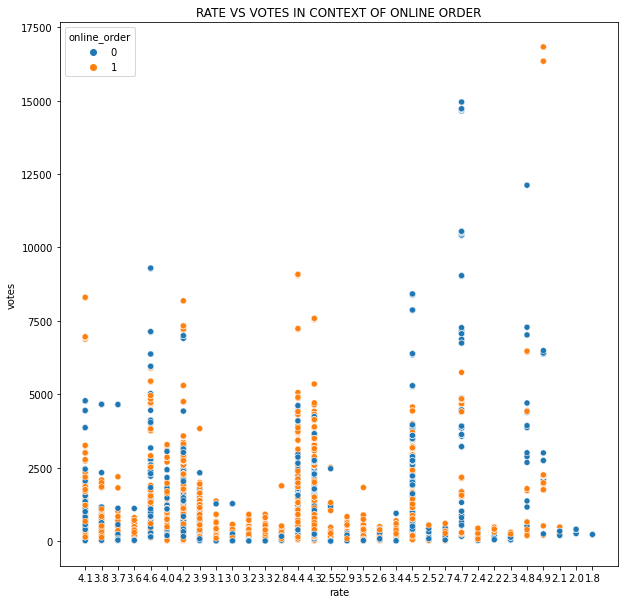

In [50]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.scatterplot(x='rate',y='votes',data=data,hue='online_order')
plt.title('RATE VS VOTES IN CONTEXT OF ONLINE ORDER')

# NO FIXED RELATION IS SEEN VERY SCATTERED IN NATURE IS SEEN

Text(0.5, 1.0, 'RATE VS VOTES IN CONTEXT OF ONLINE ORDER')

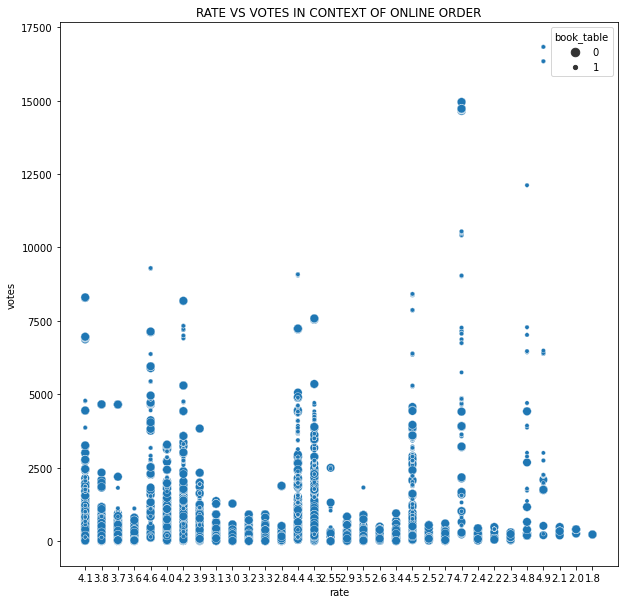

In [51]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.scatterplot(x='rate',y='votes',data=data,size='book_table')
plt.title('RATE VS VOTES IN CONTEXT OF ONLINE ORDER')

# AGAIN NO FIXED KIND OF RELATION IS SEEN 

In [52]:
#CREATING A META DATA FRAME
data_meta=data

In [53]:
data_meta.info()
    
    


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51605 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51605 non-null  object 
 1   name             51605 non-null  object 
 2   online_order     51605 non-null  int64  
 3   book_table       51605 non-null  int64  
 4   rate             51605 non-null  object 
 5   votes            51605 non-null  int64  
 6   location         51584 non-null  object 
 7   rest_type        51378 non-null  object 
 8   cuisines         51560 non-null  object 
 9   cost             51264 non-null  float64
 10  reviews_list     51605 non-null  object 
 11  menu_item        51605 non-null  object 
 12  listed_in(type)  51605 non-null  object 
 13  city             51605 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 8.4+ MB


In [54]:
data_meta=data_meta['rate'].astype(float)

In [55]:
data_meta=data_meta.round(0)

In [56]:
data_meta=pd.DataFrame(data_meta)

In [57]:
data_meta.head()

rate
0   4.0
1   4.0
2   4.0
3   4.0
4   4.0

Text(0.5, 1.0, 'DISTRIBUTION OF RATING COLUMN')

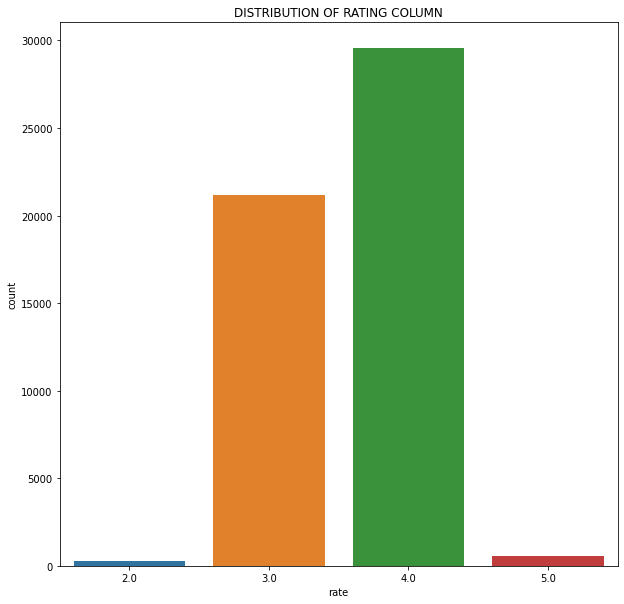

In [58]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(x='rate',data=data_meta)
plt.title("DISTRIBUTION OF RATING COLUMN")

# A LARGE NUMBER OF PEOPLE GAVE A RATING OF 3 AND  4 TO RESTAURANT

In [59]:
data['votes'].iplot(kind='hist',barmode='overlay',bargap=0.5)

In [60]:
#A SKEWED DISTRIBUTION FOR VOTES IN SEEN

# NOW LETS WORK TO ANALYZE THE MOST IMPORTANT COLUMN LOCATION 

In [61]:
data['location'].value_counts()

BTM                      5099
HSR                      2519
Koramangala 5th Block    2499
JP Nagar                 2234
Whitefield               2142
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [62]:
data['location'].replace('Koramangala 4th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 5th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 6th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 7th Block','Koramangala',inplace=True)
data['location'].replace('Koramangala 8th Block','Koramangala',inplace=True)

In [63]:
data['location'].value_counts()

Koramangala             6212
BTM                     5099
HSR                     2519
JP Nagar                2234
Whitefield              2142
                        ... 
Yelahanka                  6
West Bangalore             6
Jakkur                     3
Rajarajeshwari Nagar       2
Peenya                     1
Name: location, Length: 88, dtype: int64

# LETS SEE THE MOST TRENDY RESTAURANT IN BANGLORE

In [64]:
X=data.groupby('location').votes.count()

In [65]:
X=pd.DataFrame(X)

In [66]:
X=X.sort_values(by='votes',ascending=False)

In [67]:
X

votes
location                   
Koramangala            6212
BTM                    5099
HSR                    2519
JP Nagar               2234
Whitefield             2142
...                     ...
West Bangalore            6
Yelahanka                 6
Jakkur                    3
Rajarajeshwari Nagar      2
Peenya                    1

[88 rows x 1 columns]

In [68]:
X=X.head(10)

# TOP 10 RESTURANT WITH MOST NUMBER OF VOTES IN BANGLORE ARE

In [69]:
X.iplot(kind='bar',title="PLACES WITH MOST NUMBER OF VOTES",colors='blue')

# NOW THESE RESTURANT HAVE MOST NUMBER OF VOTES THAT MEANS THESE ARE TRENDY NOT  NECESSARILY GOD OR BAD

# LETS SEE WHICH RESTAURANT HAVE THE BEST AVERAGE RATING

In [70]:
data['rate']=data['rate'].astype(float)

In [71]:
Y=data.groupby('location').rate.mean()
Y=pd.DataFrame(Y)

In [72]:
Y=Y.sort_values(by='rate',ascending=False).head(20)

In [73]:
Y.iplot(kind='bar',colors='red',title='PLACES RESTURANT')

# THIS GRAPH GIVES PLACES WHICH HAVE RESTAURANT WHICH ARE BEST RATED BY PEOPLE

In [74]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes      location            rest_type  \
0             1           1   4.1    775  Banashankari        Casual Dining   
1             1           0   4.1    787  Banashankari        Casual Dining   
2             1           0   3.8    918  Banashankari  Cafe, Casual Dining   
3             0           0   3.7     88  Banashankari          Quick Bites   
4             0           0   3.8    166  Basavanagudi        Casual Dining   

                         cuisines   cost  \
0  North Indian, Mughlai, Chinese  800.0   
1     Chinese, North Indian, Thai  800.0   
2          Cafe, Mexican, Italian  800.0   
3      South Indian, North Indian  300.0   
4        North Indian, Rajasthani  600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type)          city  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari

# LETS CHECK WHICH RESTAURANT HAVE MAXIMUM NUMBER OF RESTAURANTS IN BANGLORE

In [75]:
Z=pd.DataFrame(data.groupby(['location']).name.count())
Z=Z.sort_values(by='name',ascending=False).head(15)
Z.head()

name
location         
Koramangala  6212
BTM          5099
HSR          2519
JP Nagar     2234
Whitefield   2142

In [76]:
Z.columns

Index(['name'], dtype='object')

In [77]:
Z.iplot(y='name',title='PLACES IN BANGLORE WITH MAXIMUM NUMBER OF RESTAURANTS',xTitle='Name of places',yTitle='Number of restaurant',colors='magenta')

# AVEARAGE COST VS LOCATION

<AxesSubplot:ylabel='Frequency'>

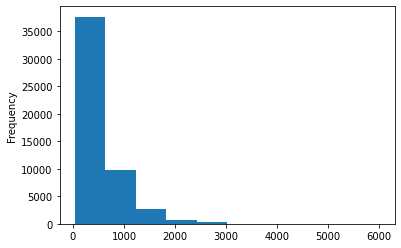

In [78]:
data['cost'].plot(kind='hist')

In [79]:
# THE COST COLUMN IS SKEWED AS EXPECTED

In [80]:
data_1=data

In [81]:
data_1['cost']=data_1['cost'].apply(lambda x:np.log(x+1))

<AxesSubplot:ylabel='Frequency'>

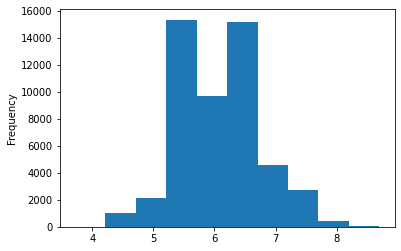

In [82]:
data_1['cost'].plot(kind='hist')

In [83]:
# LOG (1+X) TRANSFORMATION WAS BEEN USED TO SCALE DOWN THE DATA AND CONVERT INTO A NORMAL FORM 

In [84]:
A=data.groupby('location').cost.mean()

In [85]:
A=pd.DataFrame(A)
A=A.sort_values(by='cost',ascending=False).head(20)


In [86]:
A.iplot(y='cost',xTitle='location',yTitle='AVERAGE COST(ON A LOG SCALE)',title='MOST EXPENSIVE PLACES TO DINE-IN')

# MOST CHEAP PLACES TO DINE IN

In [87]:
A=data.groupby('location').cost.mean()
A=pd.DataFrame(A)
A=A.sort_values(by='cost').head(20)
A.iplot(y='cost',xTitle='location',yTitle='AVERAGE COST(ON A LOG SCALE)',title='MOST CHEAP PLACES TO DINE-IN')


In [88]:
data.head(10)

address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2  1112, Next to KIMS Medical College, 17th Cross...   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6  19/1, New Timberyard Layout, Beside Satellite ...   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                              name  online_order  book_table  \
0                                            Jalsa             1           1   
1                                   Spice Elephant             1           0   
2                                  San Churro Cafe             1           0   
3                            Addhuri Udupi Bhojana             0           0   
4                                    Grand Village             0           0   
5                                  Timepass Dinner             1           0   
6  Rosewood International Hotel - Bar & Restaurant             0           0   
7                                           Onesta             1           1   
8                                   Penthouse Cafe             1           0   
9                                        Smacznego             1           0   

   rate  votes      location            rest_type  \
0   4.1    775  Banashankari        Casual Dining   
1   4.1    787  Banashankari        Casual Dining   
2   3.8    918  Banashankari  Cafe, Casual Dining   
3   3.7     88  Banashankari          Quick Bites   
4   3.8    166  Basavanagudi        Casual Dining   
5   3.8    286  Basavanagudi        Casual Dining   
6   3.6      8   Mysore Road        Casual Dining   
7   4.6   2556  Banashankari  Casual Dining, Cafe   
8   4.0    324  Banashankari                 Cafe   
9   4.2    504  Banashankari                 Cafe   

                                      cuisines      cost  \
0               North Indian, Mughlai, Chinese  6.685861   
1                  Chinese, North Indian, Thai  6.685861   
2                       Cafe, Mexican, Italian  6.685861   
3                   South Indian, North Indian  5.707110   
4                     North Indian, Rajasthani  6.398595   
5                                 North Indian  6.398595   
6  North Indian, South Indian, Andhra, Chinese  6.685861   
7                         Pizza, Cafe, Italian  6.398595   
8                   Cafe, Italian, Continental  6.552508   
9     Cafe, Mexican, Italian, Momos, Beverages  6.311735   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
5  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
6  [('Rated 5.0', 'RATED\n  Awesome food ??Great ...        []   
7  [('Rated 5.0', 'RATED\n  I personally really l...        []   
8  [('Rated 3.0', "RATED\n  I had been to this pl...        []   
9  [('Rated 4.0', "RATED\n  Easy to locate\nVFM 3...        []   

  listed_in(type)          city  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari  
5          Buffet  Banashankari  
6          Buffet  Banashankari  
7           Cafes  Banashankari  
8           Cafes  Banashankari  
9           Cafes  Banashankari

# LOCATION WHICH OFFER MAXIMUM TABLE BOOKING

In [89]:
data_1=data[data['book_table']==1]
Z=pd.DataFrame(data_1.groupby('location').book_table.count())
Z=Z.sort_values(by='book_table',ascending=False)
Z=Z.head(10)
Z.iplot(kind='bar',xTitle='LOCATION',yTitle='no of book_table_options',title='LOCATIONS WITH MAXIMUM TABLE BOOKING')

In [90]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'city'],
      dtype='object')

C:\Users\aditya\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='listed_in(type)', ylabel='count'>

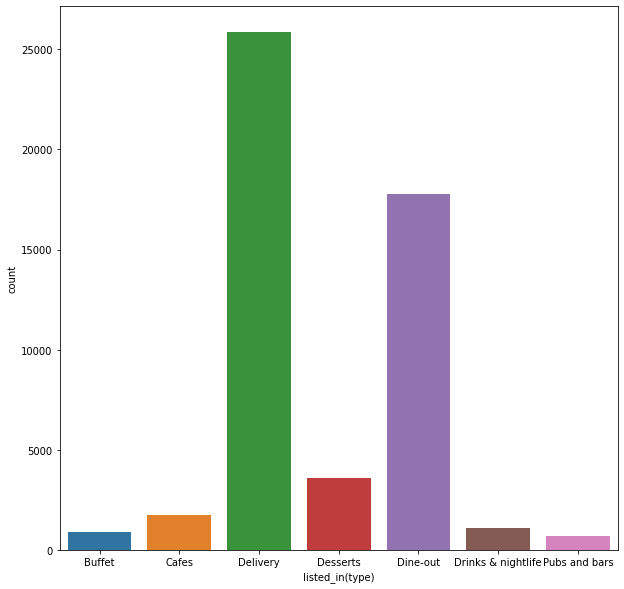

In [91]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.countplot(data['listed_in(type)'])



# SO OUR DATASET HAS MAXIMUM DELIVERY AND DINEOUT KIND OF RESTAURANTS



# LOCATION AND TYPE OF RESTAURANT

In [92]:
data.head(10)

address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2  1112, Next to KIMS Medical College, 17th Cross...   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6  19/1, New Timberyard Layout, Beside Satellite ...   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                              name  online_order  book_table  \
0                                            Jalsa             1           1   
1                                   Spice Elephant             1           0   
2                                  San Churro Cafe             1           0   
3                            Addhuri Udupi Bhojana             0           0   
4                                    Grand Village             0           0   
5                                  Timepass Dinner             1           0   
6  Rosewood International Hotel - Bar & Restaurant             0           0   
7                                           Onesta             1           1   
8                                   Penthouse Cafe             1           0   
9                                        Smacznego             1           0   

   rate  votes      location            rest_type  \
0   4.1    775  Banashankari        Casual Dining   
1   4.1    787  Banashankari        Casual Dining   
2   3.8    918  Banashankari  Cafe, Casual Dining   
3   3.7     88  Banashankari          Quick Bites   
4   3.8    166  Basavanagudi        Casual Dining   
5   3.8    286  Basavanagudi        Casual Dining   
6   3.6      8   Mysore Road        Casual Dining   
7   4.6   2556  Banashankari  Casual Dining, Cafe   
8   4.0    324  Banashankari                 Cafe   
9   4.2    504  Banashankari                 Cafe   

                                      cuisines      cost  \
0               North Indian, Mughlai, Chinese  6.685861   
1                  Chinese, North Indian, Thai  6.685861   
2                       Cafe, Mexican, Italian  6.685861   
3                   South Indian, North Indian  5.707110   
4                     North Indian, Rajasthani  6.398595   
5                                 North Indian  6.398595   
6  North Indian, South Indian, Andhra, Chinese  6.685861   
7                         Pizza, Cafe, Italian  6.398595   
8                   Cafe, Italian, Continental  6.552508   
9     Cafe, Mexican, Italian, Momos, Beverages  6.311735   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
5  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
6  [('Rated 5.0', 'RATED\n  Awesome food ??Great ...        []   
7  [('Rated 5.0', 'RATED\n  I personally really l...        []   
8  [('Rated 3.0', "RATED\n  I had been to this pl...        []   
9  [('Rated 4.0', "RATED\n  Easy to locate\nVFM 3...        []   

  listed_in(type)          city  
0          Buffet  Banashankari  
1          Buffet  Banashankari  
2          Buffet  Banashankari  
3          Buffet  Banashankari  
4          Buffet  Banashankari  
5          Buffet  Banashankari  
6          Buffet  Banashankari  
7           Cafes  Banashankari  
8           Cafes  Banashankari  
9           Cafes  Banashankari

In [93]:
data.rename(columns={'listed_in(type)':'type_of_rest'},inplace=True)

In [94]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes      location            rest_type  \
0             1           1   4.1    775  Banashankari        Casual Dining   
1             1           0   4.1    787  Banashankari        Casual Dining   
2             1           0   3.8    918  Banashankari  Cafe, Casual Dining   
3             0           0   3.7     88  Banashankari          Quick Bites   
4             0           0   3.8    166  Basavanagudi        Casual Dining   

                         cuisines      cost  \
0  North Indian, Mughlai, Chinese  6.685861   
1     Chinese, North Indian, Thai  6.685861   
2          Cafe, Mexican, Italian  6.685861   
3      South Indian, North Indian  5.707110   
4        North Indian, Rajasthani  6.398595   

                                        reviews_list menu_item type_of_rest  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []       Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []       Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []       Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []       Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []       Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [95]:
data_meta=data[['location','type_of_rest','name']]

In [96]:
data_meta

location   type_of_rest  \
0                    Banashankari         Buffet   
1                    Banashankari         Buffet   
2                    Banashankari         Buffet   
3                    Banashankari         Buffet   
4                    Basavanagudi         Buffet   
...                           ...            ...   
51712                  Whitefield  Pubs and bars   
51713                  Whitefield  Pubs and bars   
51714                  Whitefield  Pubs and bars   
51715  ITPL Main Road, Whitefield  Pubs and bars   
51716  ITPL Main Road, Whitefield  Pubs and bars   

                                                    name  
0                                                  Jalsa  
1                                         Spice Elephant  
2                                        San Churro Cafe  
3                                  Addhuri Udupi Bhojana  
4                                          Grand Village  
...                                                  ...  
51712  Best Brews - Four Points by Sheraton Bengaluru...  
51713                           Vinod Bar And Restaurant  
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...  
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...  
51716                       The Nest - The Den Bengaluru  

[51605 rows x 3 columns]

In [97]:
Z=data_meta.groupby(['location','type_of_rest']).name.count()

In [98]:
Z=pd.DataFrame(Z)

In [99]:
Z

name
location    type_of_rest            
BTM         Buffet                25
            Cafes                 83
            Delivery            3070
            Desserts             202
            Dine-out            1678
...                              ...
Yeshwantpur Delivery              88
            Desserts               3
            Dine-out              25
            Drinks & nightlife     1
            Pubs and bars          1

[448 rows x 1 columns]

# THIS IS A VERY IMPORATANT TABLE SINCE IT ALLOWS TO SEE WHICH TYPE OF RESTAURANT IS IN A PARTICULAR LOACTION

# NO OF CUISINES 

In [100]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes      location            rest_type  \
0             1           1   4.1    775  Banashankari        Casual Dining   
1             1           0   4.1    787  Banashankari        Casual Dining   
2             1           0   3.8    918  Banashankari  Cafe, Casual Dining   
3             0           0   3.7     88  Banashankari          Quick Bites   
4             0           0   3.8    166  Basavanagudi        Casual Dining   

                         cuisines      cost  \
0  North Indian, Mughlai, Chinese  6.685861   
1     Chinese, North Indian, Thai  6.685861   
2          Cafe, Mexican, Italian  6.685861   
3      South Indian, North Indian  5.707110   
4        North Indian, Rajasthani  6.398595   

                                        reviews_list menu_item type_of_rest  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []       Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []       Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []       Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []       Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []       Buffet   

           city  
0  Banashankari  
1  Banashankari  
2  Banashankari  
3  Banashankari  
4  Banashankari

In [101]:
def fun(x):
    if (type(x)==list):
        return (len(x))
    else:
        return 0

        

In [102]:
data['no_of_cuisines']=data['cuisines'].str.split(',').apply(fun)

In [103]:
data.head()

address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes      location            rest_type  \
0             1           1   4.1    775  Banashankari        Casual Dining   
1             1           0   4.1    787  Banashankari        Casual Dining   
2             1           0   3.8    918  Banashankari  Cafe, Casual Dining   
3             0           0   3.7     88  Banashankari          Quick Bites   
4             0           0   3.8    166  Basavanagudi        Casual Dining   

                         cuisines      cost  \
0  North Indian, Mughlai, Chinese  6.685861   
1     Chinese, North Indian, Thai  6.685861   
2          Cafe, Mexican, Italian  6.685861   
3      South Indian, North Indian  5.707110   
4        North Indian, Rajasthani  6.398595   

                                        reviews_list menu_item type_of_rest  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []       Buffet   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []       Buffet   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []       Buffet   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []       Buffet   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []       Buffet   

           city  no_of_cuisines  
0  Banashankari               3  
1  Banashankari               3  
2  Banashankari               3  
3  Banashankari               2  
4  Banashankari               2

In [104]:
data.iplot(kind='line',x='rate',y='no_of_cuisines',xTitle='rating of the restaurant',yTitle='no of cuisines offered',title='rating vs no of cuisines',mode='markers')

In [105]:
data.corr()

online_order  book_table      rate     votes      cost  \
online_order        1.000000    0.000546  0.238755  0.034407  0.001758   
book_table          0.000546    1.000000  0.394935  0.405483  0.557966   
rate                0.238755    0.394935  1.000000  0.410124  0.417199   
votes               0.034407    0.405483  0.410124  1.000000  0.371852   
cost                0.001758    0.557966  0.417199  0.371852  1.000000   
no_of_cuisines      0.106458    0.261629  0.248918  0.229628  0.346229   

                no_of_cuisines  
online_order          0.106458  
book_table            0.261629  
rate                  0.248918  
votes                 0.229628  
cost                  0.346229  
no_of_cuisines        1.000000

# NOT MUCH CORRLELATION IS SEEN WITH RATING 

# BUT NUMBER OF CUISINES SHOW A SLIGHT CORRLELATION OF 0.34 WITH COST

# AVERAGE  NUMBER OF CUISINES AVAILABLE LOCATION WISE


In [106]:
data_meta=data.groupby('location').no_of_cuisines.mean()
data_meta=pd.DataFrame(data_meta.sort_values(ascending=False))
data_meta=data_meta.head(10)

In [107]:
data_meta

no_of_cuisines
location                             
Central Bangalore            4.250000
Jakkur                       4.000000
Koramangala 2nd Block        3.588235
Infantry Road                3.533333
Old Madras Road              3.454545
West Bangalore               3.333333
North Bangalore              3.071429
Cunningham Road              3.012245
Church Street                2.952548
Kanakapura Road              2.894737

In [108]:
data_meta.iplot(mode='markers',title='Location with most number of cuisines',xTitle='location',yTitle='no_of_cuisines',colors='red')